In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat
from diffusion_map import diffusion_map
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Load data and do set up

In [2]:
base_scurve = loadmat('../data/dataset1.mat')['data3']
emojis = loadmat('../data/dataset3.mat')['data3']

noisy_scurves = {}
for amt in np.around(np.linspace(0.1, 0.45, num=8), decimals=2):
    noisy_scurves[amt] = loadmat(f'../data/dataset2_{amt}.mat')['data3']

In [19]:
def plot_methods(pca, iso, lle, sne, map, saveme=None):
    k = pca.shape[1]  # get embedding dimension (should be the same for all)

    if k == 2:
        fig, axes = plt.subplots(figsize=(8, 12), ncols=2, nrows=3)

        axes[0,0].scatter(pca[:,0], pca[:,1])
        axes[0,0].set_title('PCA')

        axes[1,0].scatter(iso[:,0], iso[:,1])
        axes[1,0].set_title('Isomap')

        axes[0,1].scatter(lle[:,0], lle[:,1])
        axes[0,1].set_title('LLE')

        axes[1,1].scatter(sne[:,0], sne[:,1])
        axes[1,1].set_title('t-SNE')

        axes[2,0].scatter(map[:,0], map[:,1])
        axes[2,0].set_title('Diffusion map')

        axes[2,1].axis('off')
    elif k == 3:
        fig = plt.figure(figsize=(8, 12))

        ax = fig.add_subplot(3, 2, 1, projection='3d')
        ax.scatter(pca[:,0], pca[:,1], pca[:,2])
        ax.set_title('PCA')
        
        ax = fig.add_subplot(3, 2, 2, projection='3d')
        ax.scatter(iso[:,0], iso[:,1], iso[:,2])
        ax.set_title('Isomap')
        
        ax = fig.add_subplot(3, 2, 3, projection='3d')
        ax.scatter(lle[:,0], lle[:,1], lle[:,2])
        ax.set_title('LLE')
        
        ax = fig.add_subplot(3, 2, 4, projection='3d')
        ax.scatter(sne[:,0], sne[:,1], sne[:,2])
        ax.set_title('t-SNE')
        
        ax = fig.add_subplot(3, 2, 5, projection='3d')
        ax.scatter(map[:,0], map[:,1], map[:,2])
        ax.set_title('Diffusion map')
    else: raise RuntimeError(f'embedded dimension must be 2 or 3, was {k}')

    if saveme is not None: plt.savefig(saveme) 
    plt.show()

## Dataset 1: Normal S-curve

In [15]:
k = 2
pca = PCA(n_components=k).fit_transform(base_scurve)
iso = Isomap(n_components=k).fit_transform(base_scurve)
lle = LocallyLinearEmbedding(n_components=k).fit_transform(base_scurve)
sne = TSNE(n_components=k).fit_transform(base_scurve)
map = diffusion_map(base_scurve, dim=k)

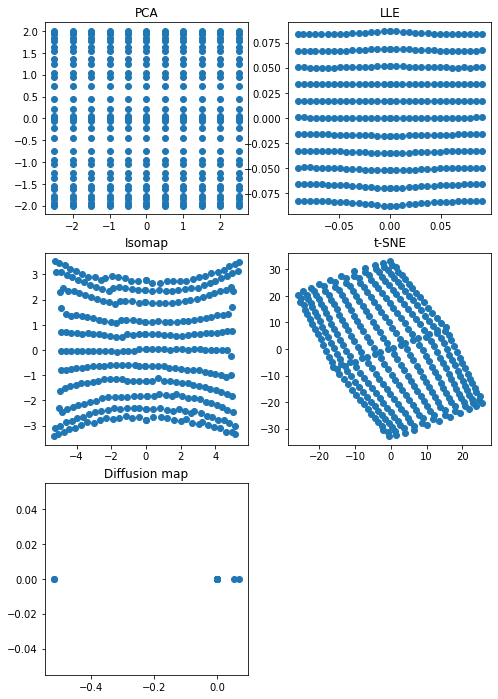

In [16]:
plot_methods(pca, iso, lle, sne, map)

## Dataset 2: Noisy S-curves

## Dataset 3: Emoji dataset

In [23]:
k = 3
pca = PCA(n_components=k).fit_transform(emojis)
iso = Isomap(n_components=k).fit_transform(emojis)
lle = LocallyLinearEmbedding(n_components=k).fit_transform(emojis)
sne = TSNE(n_components=k).fit_transform(emojis)
map = diffusion_map(emojis, alpha=1, dim=k)

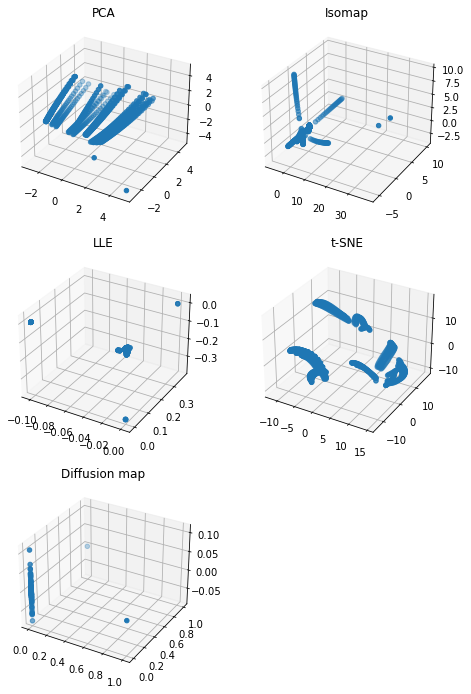

In [24]:
plot_methods(pca, iso, lle, sne, map)